<h1 align="center">Computação II</h1>
<h2 align="Center">Tópico extra<br>Mecânica Newtoniana</h2>
<h3 align="center">UFRJ - Engenharia<br>Ciclo básico</h3>
<h3 align="center">Prof. Pedro Asad</h3>
<hr>

In [1]:
import time
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
print time.strftime('Última atualização:\n\t%d de %B de %Y (%A), %H:%M').capitalize()

Última atualização:
	01 de junho de 2015 (segunda), 23:26


#Queda-livre
<a name="queda_livre"></a>

O movimento de queda livre sob aceleração constante é um modelo físico excessivamente simplificado. Dentro da atmosfera há, além da gravidade, a resistência do ar atuando sobre um corpo em queda. Como esta é proporcional à velocidade, chega um momento em que o corpo atinge uma velocidade limite, chamada _velocidade terminal_.

Neste modelo, a variação de velocidade pode ser descrita pela equação diferencial

$$
v' = -g - kv
$$

onde $g$ representa a aceleração da gravidade (em $\text{m}/\text{s}^2$) e $k$ designa o coeficiente de resistência do ar ($1/\text{s}^2$). Esta equação pode ser resolvida usando o método de fatores integrantes, multiplicando ambos os lados da equação por [$e^{kt}$](^1) e obtendo
$$
v'e^{kt} -ke^{kt}v = -ge^{kt}
$$
cujo lado esquerdo pode ser visto como a derivada do produto $ve^{kt}$. Com isto, integramos de ambos os lados, obtendo
$$
ve^{kt} = -\frac{g}{k}e^{kt} + C_1
$$
e, por fim,
$$
v(t) = -\frac{g}{k} + C_1 e^{-kt}
$$
Assumindo que a velocidade inicial em $t=0$, $v_0$, seja conhecida, podemos determinar $C_1$ e obter a expressão final
$$
v(t) = -\frac{g}{k} + \left( v_0 + \frac{g}{k} \right) e^{-kt}
$$
A velocidade terminal $v_T$ é dada, simplesmente, por 
$$v_T = \lim\limits_{t \rightarrow \infty} v(t) = -\frac{g}{k}$$

A equação temporal da velocidade pode ser integrada no tempo, dando origem à equação de posição
$$
p(t) = - \frac{g}{k}t - \frac{1}{k} \left( v_0 + \frac{g}{k} \right) e^{-kt} + C_2
$$
Se a posição inicial, em $t = 0$, $p_0$, for conhecida, podemos resolver $C_2$ e chegar à expressão final
$$
p(t) = p_0 - \frac{g}{k}t + \frac{1}{k} \left( v_0 + \frac{g}{k} \right) (1-e^{-kt})
$$

##Sequências temporais
Para calcular uma sequência de amostras de posição e velocidade em instantes de tempo $\left\{ t_0, t_1, t_2, \ldots \right\}$ a partir destas equações bastaria, em princípio, aplicar estes valores às leis temporais descritas acima. Entretanto, no método `atualizar` da classe `ModeloCinematico`, nos é dado apenas o lapso de tempo $\Delta$ e, através dos atributos, temos acesso à posição e à velocidade no instante anterior. Para sobrecarrega este método utilizando as estas equações precisaríamos de um atributo adicional para armazenar o tempo absoluto. Felizmente, é possível obter, a partir destas equações, sequências temporais em que cada elemento dependa apenas do lapso de tempo e do elemento anterior. A lei de sequência da velocidade correspondente é
$$
v_{i+1} = v_i + \left(v_i + \frac{g}{k} \right)(e^{-k\Delta t} - 1)
$$
e a da posição é
$$
p_{i+1} = p_i + - \frac{g}{k} \Delta t - \frac{1}{k} \left(v_i + \frac{g}{k} \right)(e^{-k\Delta t} - 1)
$$
para todo $i \geq 0$ inteiro. Além do mais, estas equações não exigem que os instantes de tempo sejam uniformemente espaçados.

[^1]: Um fator integrante mais genérico seria $e^{kt + C_0}$, mas escolhi $C_0 = 0$ por simplicidade.

In [28]:
g = 10.0

class QuedaAtenuada:
    def __init__(self, p_0, v_0, v_T):
        self.k = -g / v_T
        self.p_0 = p_0
        self.v_0 = v_0
        
    def vel(self, t):
        k = self.k
        p_0 = self.p_0
        v_0 = self.v_0
        
        return -(g / k) + (v_0 + g / k) * np.exp(-k * t)
    
    def pos(self, t):
        k = self.k
        p_0 = self.p_0
        v_0 = self.v_0
        
        return p_0 -(g / k) * t - (v_0 / k + g / k**2) * (np.exp(-k * t) - 1)

##Pára-quedas fechado
A velocidade terminal de um objeto depende de muitos fatores. Mas um valor razoável para a velocidade terminal de um humano adulto, caindo de braços abertos, seria de $200~\text{km/h}$ ou $55.55\ldots~\text{m/s}$. Assim, o coeficiente de resistência do ar seria
$$
k_L = \frac{-g}{v_T} = \frac{-10}{-55.55\ldots} = 0.18
$$

Os gráficos abaixo mostram a evolução da altitude e da velocidade de queda livre de um salto de 4 quilômetros de altura ao longo de trinta segundos.

In [12]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 1000

([<matplotlib.axis.XTick at 0x7f5f88078490>,
 <a list of 6 Text xticklabel objects>)

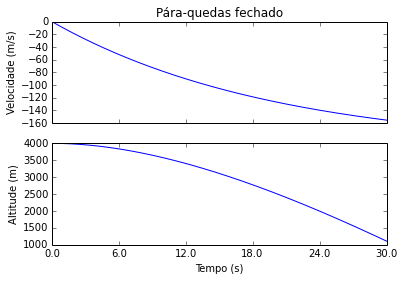

In [39]:
queda_livre = QuedaAtenuada(4000, 0, -200)

T = np.linspace(0, 30, n+1)
V = queda_livre.vel(T)
P = queda_livre.pos(T)

plt.subplot(2, 1, 1)
plt.plot(T, V)
plt.ylabel('Velocidade (m/s)')
plt.title(u'Pára-quedas fechado')
plt.xticks(T[::200], [])

plt.subplot(2, 1, 2)
plt.plot(T, P)
plt.ylabel('Altitude (m)')
plt.xlabel('Tempo (s)')
plt.xticks(T[::200], T[::200].astype(np.str))

##Pára-quedas aberto
Com o pára-quedas aberto, podemos idealizar uma velocidade terminal de $-1~\text{m/s}$ e usá-la para calcular o coeficiente de resistência do ar como
$$
k_P = \frac{-g}{v_T} = \frac{-10}{-1} = 10
$$

Os gráficos abaixo mostram a evolução da altitude e da velocidade de queda após a abertura do pára-quedas (no instante de 30 segundos após o salto) ao longo de trinta segundos.

([<matplotlib.axis.XTick at 0x7f5f8819bad0>,
 <a list of 6 Text xticklabel objects>)

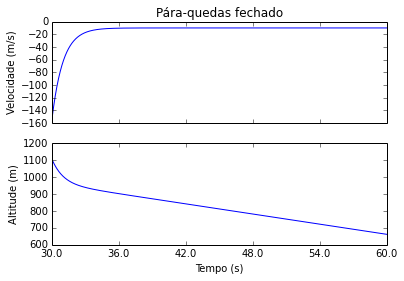

In [38]:
para_quedas = QuedaAtenuada(queda_livre.pos(30), queda_livre.vel(30), -10)

T = np.linspace(0, 30, n+1)
V = para_quedas.vel(T)
P = para_quedas.pos(T)

plt.subplot(2, 1, 1)
plt.plot(T, V)
plt.ylabel('Velocidade (m/s)')
plt.title(u'Pára-quedas fechado')
plt.xticks(T[::200], [])

plt.subplot(2, 1, 2)
plt.plot(T, P)
plt.ylabel('Altitude (m)')
plt.xlabel('Tempo (s)')
plt.xticks(T[::200], (T[::200] + 30).astype(np.str))